In [2]:
#Load time lapse fluorescence data from Matlab file "task1.mat" that is in the main course folder. 
#Data are stored in two matrices: x_norm contains trajectories and t is a time vector

import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plotter
from scipy.fftpack import fft


data = sio.loadmat('./task1.mat')

x = np.transpose(data['x_norm'])
time = np.transpose(data['t'])

print(time.shape)
print(x.shape)

(101, 1)
(101, 501)


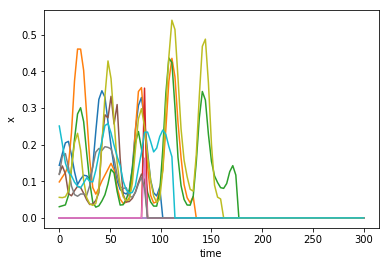

In [3]:
#Plot (with labels) example cell tracetories | Tip: transpose the loaded data to get first dimension the same

plotter.plot(time, x[:,:10]) 
plotter.xlabel('time')
plotter.ylabel('x')
plotter.axis('tight')
plotter.show()

In [9]:
#Find peaks in each trajectories usin scipy library functions | Tip: Search for suitable functions in scipy manual

from scipy.signal import find_peaks

peak=[]
amplitude=np.zeros(501)

for i in range (0,501):
    d = x[:,i]
    peaks, _ = find_peaks(d, height=0)
    amplitude[i]=np.mean(d[peaks])
    peak.append(peaks)
    
print(amplitude[0])
print(peak[0])


0.21722033416977998
[ 3  8 14 27 33]


/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [10]:
#Calculate period of oscillations | 
#Tip: the period of oscillation is a distance between peaks in a single cell trajectory

period=[]
for i in range (0,501):
    difvector=[]
    for j in range(len(peak[i])-1):
        dif = (peak[i][j+1]-peak[i][j])
        difvector.append(dif)
    period.append(np.mean(difvector))
        
print(period[0])

periodt = np.array(period) 
periodt = np.nan_to_num(periodt) # nan values to 0
periodtime=periodt*3
periodtime[0]
    
    

7.5


/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/osboxes/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


22.5

(array([110.,   0.,   1.,   0.,   0.,   2.,   1.,   6.,   6.,  12.,  19.,
         30.,  58.,  62.,  87.,  67.,  18.,  13.,   6.,   3.]),
 array([ 0.   ,  2.025,  4.05 ,  6.075,  8.1  , 10.125, 12.15 , 14.175,
        16.2  , 18.225, 20.25 , 22.275, 24.3  , 26.325, 28.35 , 30.375,
        32.4  , 34.425, 36.45 , 38.475, 40.5  ]),
 <a list of 20 Patch objects>)

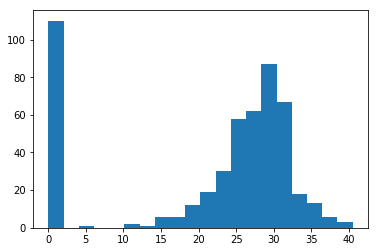

In [11]:
#Draw histograms of period distribution

plotter.hist(periodtime, bins=20)

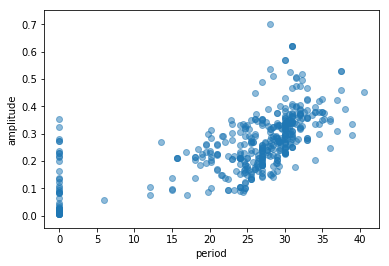

In [12]:
#Plot amplitude vs period with labels 

from sklearn.datasets import load_iris
iris = load_iris()

plotter.scatter(periodtime, amplitude, alpha=0.5, cmap='viridis') 
plotter.xlabel("period")
plotter.ylabel("amplitude");

In [21]:
#Select ten cell trajectiories with the smallest periods and plot those as a heat map

freq = 1/periodtime

#change infinite freq to a minimum value
import pandas as pd

pd.options.mode.use_inf_as_na = True
df = pd.DataFrame(data=freq)
df.fillna(df.min(),inplace=True)

#select 10 highest frecuency(lowest period)
import heapq 
print(heapq.nlargest(10, range(len(freq)), freq.take))

tentrajectories = x[:,[415,142,150,23,7,160,181,5,40,52]]


[415, 142, 150, 23, 7, 160, 181, 5, 40, 52]


/home/osboxes/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


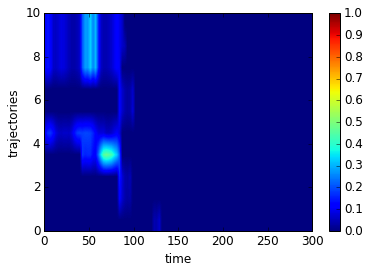

In [22]:
fig = plotter.figure()
plotter.style.use('classic')
plotter.imshow(tentrajectories.T, extent=[0,300,0,10], aspect='auto',origin='lower', 
          cmap="jet")
plotter.xlabel('time')
plotter.ylabel('trajectories')
plotter.colorbar()
plotter.clim(0,1)

Text(0,0.5,'power(signal)')

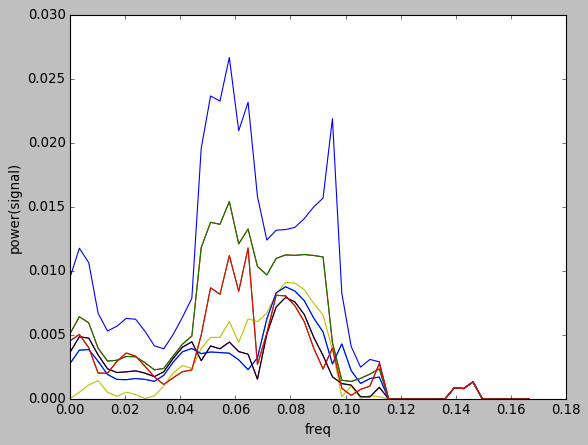

In [52]:
#Perform frequency analysis using FFT Fourier transformation and identify a dominant frequency in the signal

# Number of sample points
N = 101

# sample spacing
T = 3 
yf = fft(tentrajectories)
#yf = fft(x)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)
plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plotter.xlabel('freq')
plotter.ylabel('power(signal)')

In [56]:
lowperiod=([periodtime[415],periodtime[142],periodtime[150],periodtime[23],periodtime[7],periodtime[160],periodtime[181],
            periodtime[5],periodtime[40],periodtime[52]])
lowwperiod=np.array(lowperiod)
print(lowwperiod)

array([ 6. , 12. , 12. , 13.5, 15. , 15. , 15. , 15.6, 15.6, 15.6])

Text(0,0.5,'Power (signal)')

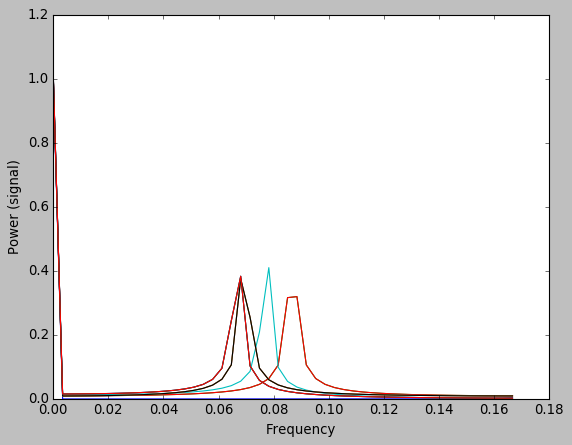

In [57]:
N = 101 
T = 3 

x = np.linspace(0.0, N*T, N)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

for i in range(0,10):
    F=1/lowwperiod[i]
    y = 0.5*(1+np.sin(F * 2.0*np.pi*x)) 
    yf = fft(y)
    plotter.plot(xf, 2.0/N * np.abs(yf[0:N//2]))

plotter.xlabel('Frequency')
plotter.ylabel('Power (signal)')